## CUSTOMER ANALYSIS

In [1]:

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from IPython.display         import Image

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

import pydotplus         as pdp



In [2]:
import os
os.getcwd()


'/Users/nhatlan/Documents/projectDM/notebooks'

In [3]:
df= pd.read_csv("../data/processed/bank_marketing_raw.csv")

In [4]:
cus_df = df[['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'target']]

In [5]:
for col in cus_df.columns:
    print(f"\n===== Column: {col} =====")
    pct = pd.crosstab(df[col], df['target'], normalize='index').sort_values(by = [1], ascending=[False])
    print(pct.round(3))


===== Column: age =====
target      0      1
age                 
93      0.000  1.000
92      0.000  1.000
90      0.000  1.000
85      0.200  0.800
87      0.250  0.750
..        ...    ...
44      0.918  0.082
50      0.923  0.077
88      1.000  0.000
89      1.000  0.000
94      1.000  0.000

[77 rows x 2 columns]

===== Column: job =====
target             0      1
job                        
student        0.713  0.287
retired        0.772  0.228
unemployed     0.845  0.155
management     0.862  0.138
admin.         0.878  0.122
self-employed  0.882  0.118
technician     0.889  0.111
services       0.911  0.089
housemaid      0.912  0.088
entrepreneur   0.917  0.083
blue-collar    0.927  0.073

===== Column: marital =====
target        0      1
marital               
single    0.851  0.149
divorced  0.881  0.119
married   0.899  0.101

===== Column: education =====
target         0      1
education              
tertiary   0.850  0.150
secondary  0.894  0.106
primary    0.914  0

## ĐƠN BIẾN

### AGE

In [6]:
cus_df['age_group_1'] = pd.cut(cus_df['age'], bins= [0, 18, 25, 45, 65, 120],
                             labels= ['Formative Years', 'Early Career', 'Mid-Career', 'Pre-Retirement', 'Retirement'],
                             right= True)
ag1_count = cus_df.groupby('age_group_1').size()
ag1_count = pd.DataFrame(ag1_count).reset_index()
ag1_count


/var/folders/kr/kwr_0qbj425dp77_59mypb0w0000gn/T/ipykernel_8168/234245647.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cus_df['age_group_1'] = pd.cut(cus_df['age'], bins= [0, 18, 25, 45, 65, 120],
/var/folders/kr/kwr_0qbj425dp77_59mypb0w0000gn/T/ipykernel_8168/234245647.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ag1_count = cus_df.groupby('age_group_1').size()


,age_group_1,0
0,Formative Years,12
1,Early Career,1324
2,Mid-Career,29427
3,Pre-Retirement,13697
4,Retirement,751


In [7]:

pct_age = pd.crosstab(cus_df['age_group_1'], cus_df['target'], 
                      normalize='index').sort_values(by= 1, ascending=False).round(2)
pct_age = pd.DataFrame(pct_age.reset_index())

pct_age

target,age_group_1,0,1
0,Formative Years,0.42,0.58
1,Retirement,0.57,0.43
2,Early Career,0.76,0.24
3,Pre-Retirement,0.89,0.11
4,Mid-Career,0.89,0.11


Text(0.5, 1.0, 'Subcription Rate By Age Group')

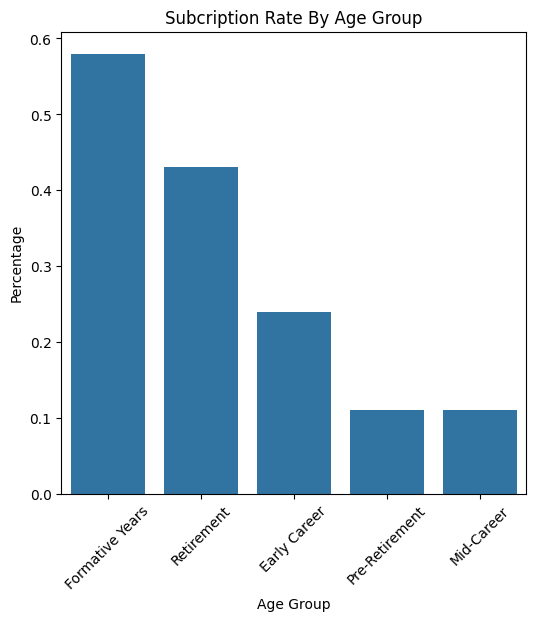

In [8]:
order = pct_age.sort_values(by=1, ascending=False)['age_group_1']
plt.figure(figsize=(6, 6))
sns.barplot(data= pct_age, x= 'age_group_1', y= 1, order=order)
plt.tick_params(axis='x', rotation= 45)
plt.xlabel('Age Group')
plt.ylabel('Percentage')
plt.title('Subcription Rate By Age Group')

**Phân nhóm độ tuổi sử dụng Decision Tree nhằm xác định các ngưỡng phân tách tối ưu theo dữ liệu**

In [9]:
age_tree = DecisionTreeClassifier(max_depth=4, min_samples_leaf=0.05)
age_tree.fit(df[['age']], df['target'])


,criterion,'gini'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,0.05
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


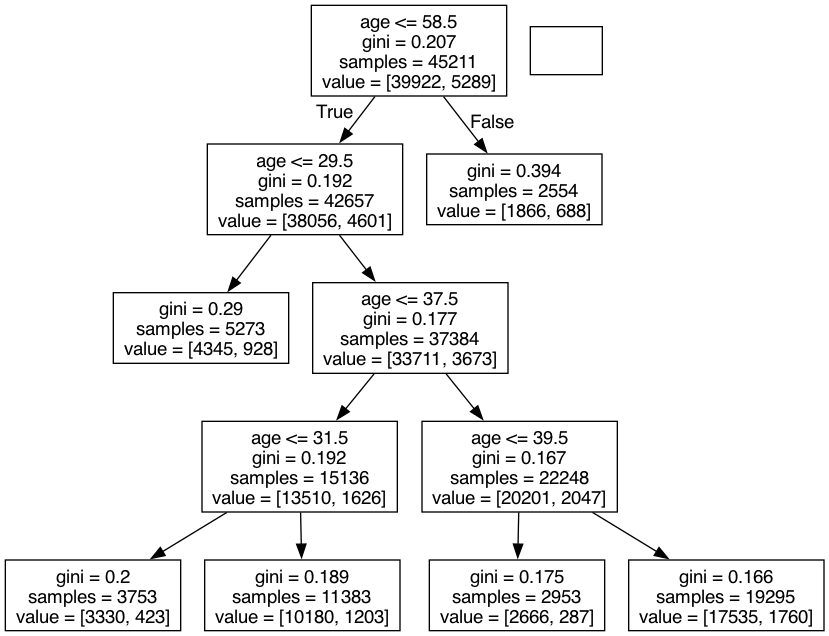

In [10]:
## Biểu diễn cây quyết định
dcs_tree = tree.export_graphviz(age_tree, out_file = None, feature_names = ['age'])
graph    = pdp.graph_from_dot_data(dcs_tree)
Image(graph.create_png())

In [11]:
cus_df.loc[:,'age_group_2'] = pd.cut(cus_df.loc[:,'age'], bins= [0, 29.5, 37.5, 58.5, 120],
                             labels= ['< 29', '29 - 37', '37-58', '> 58'],
                             right= True)
ag2_count = cus_df.groupby('age_group_2', observed=True).size()
ag2_count = pd.DataFrame(ag2_count).reset_index()
ag2_count

/var/folders/kr/kwr_0qbj425dp77_59mypb0w0000gn/T/ipykernel_8168/1322626860.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cus_df.loc[:,'age_group_2'] = pd.cut(cus_df.loc[:,'age'], bins= [0, 29.5, 37.5, 58.5, 120],


,age_group_2,0
0,< 29,5273
1,29 - 37,15136
2,37-58,22248
3,> 58,2554


In [12]:
pct_age = pd.crosstab(cus_df['age_group_2'], cus_df['target'], 
                      normalize='index').sort_values(by= 1, ascending=False).round(2)
pct_age = pd.DataFrame(pct_age.reset_index())
pct_age

target,age_group_2,0,1
0,> 58,0.73,0.27
1,< 29,0.82,0.18
2,29 - 37,0.89,0.11
3,37-58,0.91,0.09


Text(0.5, 1.0, 'Subcription Rate By Age Group')

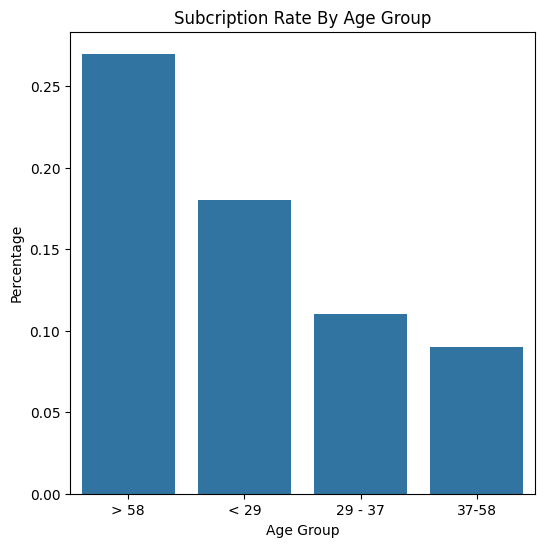

In [13]:
order = pct_age.sort_values(by=1, ascending=False)['age_group_2']
plt.figure(figsize=(6, 6))
sns.barplot(data= pct_age, x= 'age_group_2', y= 1, order=order)
plt.xlabel('Age Group')
plt.ylabel('Percentage')
plt.title('Subcription Rate By Age Group')

### BALANCE

In [14]:
from optbinning import OptimalBinning

optb = OptimalBinning(
    name="balance",
    dtype="numerical",
    max_n_bins=5
)

optb.fit(cus_df['balance'], cus_df['target'])

binning_table = optb.binning_table.build()
binning_table


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, -46.50)",3193,0.070624,3027,166,0.051989,0.882041,0.039195,0.004747
1,"[-46.50, 60.50)",7628,0.168720,7034,594,0.077871,0.450333,0.028770,0.003566
2,"[60.50, 798.50)",17577,0.388777,15614,1963,0.111680,0.052396,0.001046,0.000131
3,"[798.50, 1578.50)",6369,0.140873,5521,848,0.133145,-0.147865,0.003259,0.000407
4,"[1578.50, inf)",10444,0.231006,8726,1718,0.164496,-0.396152,0.042091,0.005227
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,45211,1.000000,39922,5289,0.116985,,0.114360,0.014078


In [15]:
cus_df.loc[:, 'balance_group'] = pd.cut(cus_df.loc[:, 'balance'], bins= [-9999, -46.5, 60.5, 798.5, 1578.5, 99999999],
                                 labels= ['< -46.5', '-46.5 - 60.5', '60.5 - 798.5', '798.5 - 1578.5', '> 1578.5'],
                                 right= False)

pct_balance = pd.crosstab(cus_df['balance_group'], cus_df['target'], 
                      normalize='index').sort_values(by= 1, ascending=False).round(2)
pct_balance = pd.DataFrame(pct_balance.reset_index())
pct_balance

/var/folders/kr/kwr_0qbj425dp77_59mypb0w0000gn/T/ipykernel_8168/5369981.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cus_df.loc[:, 'balance_group'] = pd.cut(cus_df.loc[:, 'balance'], bins= [-9999, -46.5, 60.5, 798.5, 1578.5, 99999999],


target,balance_group,0,1
0,> 1578.5,0.84,0.16
1,798.5 - 1578.5,0.87,0.13
2,60.5 - 798.5,0.89,0.11
3,-46.5 - 60.5,0.92,0.08
4,< -46.5,0.95,0.05


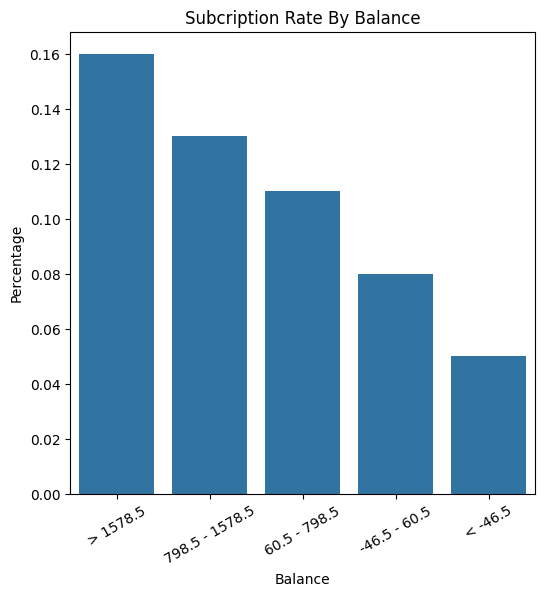

In [16]:
order = pct_balance.sort_values(by=1, ascending=False)['balance_group']
plt.figure(figsize=(6, 6))
sns.barplot(data= pct_balance, x= 'balance_group', y= 1, order=order)
plt.xlabel('Balance')
plt.ylabel('Percentage')
plt.title('Subcription Rate By Balance')
plt.tick_params(axis= 'x', rotation= 30)

### JOB

In [17]:
pct_job = pd.crosstab(
    cus_df['job'],
    cus_df['target'],
    normalize='index'
).round(3).reset_index()

pct_job = pct_job.sort_values(by=1, ascending=False)
pct_job


target,job,0,1
8,student,0.713,0.287
5,retired,0.772,0.228
10,unemployed,0.845,0.155
4,management,0.862,0.138
0,admin.,0.878,0.122
6,self-employed,0.882,0.118
9,technician,0.889,0.111
7,services,0.911,0.089
3,housemaid,0.912,0.088
2,entrepreneur,0.917,0.083


Text(0.5, 1.0, 'Subscription Rate by Job')

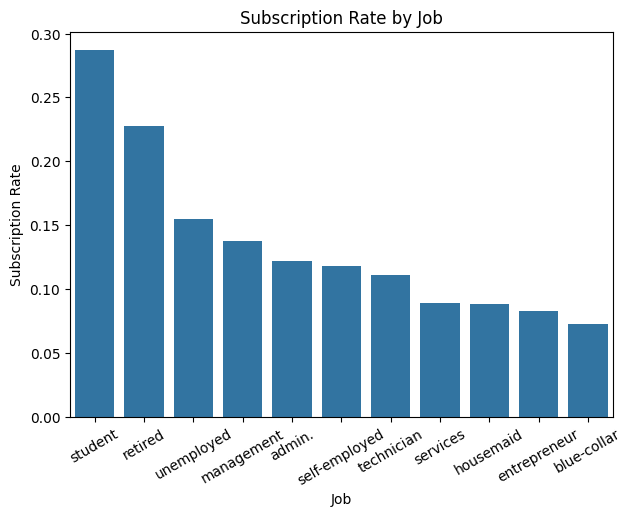

In [18]:
plt.figure(figsize=(7,5))
sns.barplot(
    data=pct_job,
    x='job',
    y=1,
    order=pct_job['job']
)
plt.xticks(rotation=30)
plt.xlabel('Job')
plt.ylabel('Subscription Rate')
plt.title('Subscription Rate by Job')


### HOUSING

In [19]:
housing_df = cus_df[['housing', 'target']].copy()
housing_dist = housing_df['housing'].value_counts(normalize=True).round(3)
housing_dist

housing
yes    0.556
no     0.444
Name: proportion, dtype: float64

In [20]:
pct_housing = pd.crosstab(
    housing_df['housing'],
    housing_df['target'],
    normalize='index'
).round(3)

pct_housing


target,0,1
housing,,
no,0.833,0.167
yes,0.923,0.077


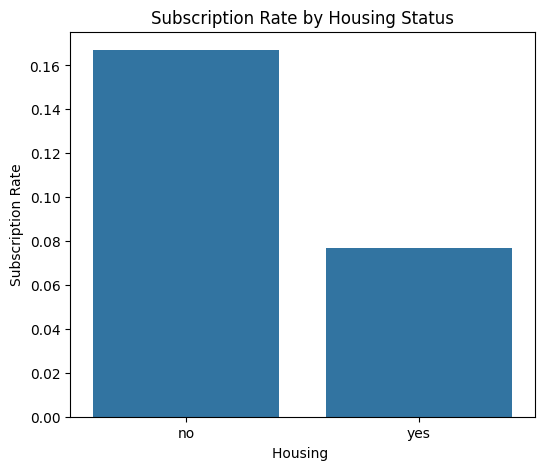

In [21]:
pct_housing_plot = pct_housing.reset_index()

plt.figure(figsize=(6,5))
sns.barplot(
    data=pct_housing_plot,
    x='housing',
    y=1
)
plt.xlabel('Housing ')
plt.ylabel('Subscription Rate')
plt.title('Subscription Rate by Housing Status')
plt.show()


### LOAN

In [22]:
cus_df['loan'].value_counts(normalize=True).round(3)

loan
no     0.84
yes    0.16
Name: proportion, dtype: float64

In [23]:
loan_target = pd.crosstab(
    cus_df['loan'],
    cus_df['target'],
    normalize='index'
).round(3)

loan_target


target,0,1
loan,,
no,0.873,0.127
yes,0.933,0.067


Text(0.5, 1.0, 'Subscription Rate by Loan')

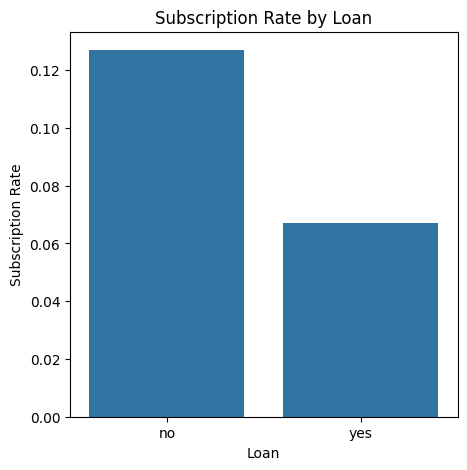

In [24]:
loan_target = loan_target.reset_index()

plt.figure(figsize=(5,5))
sns.barplot(data=loan_target, x='loan', y=1)
plt.xlabel('Loan')
plt.ylabel('Subscription Rate')
plt.title('Subscription Rate by Loan')


### Phân tích nên kết hợp biến nào

In [25]:
cat_cols = [
    'job',
    'housing',
    'loan',
    'balance_group',
    'age_group_2'
]
summary = []

for col in cat_cols:
    pct = pd.crosstab(
        cus_df[col],
        cus_df['target'],
        normalize='index'
    )[1]

    summary.append({
        'variable': col,
        'max_rate': pct.max(),
        'min_rate': pct.min(),
        'range': pct.max() - pct.min()
    })

univariate_df = (
    pd.DataFrame(summary)
    .sort_values('range', ascending=False)
)

univariate_df

,variable,max_rate,min_rate,range
0,job,0.286780,0.072750,0.214031
4,age_group_2,0.269381,0.092008,0.177373
3,balance_group,0.164496,0.051989,0.112508
1,housing,0.167024,0.077000,0.090024
2,loan,0.126557,0.066814,0.059743


In [26]:
def cis_score(var1, var2, df, target='target'):
    """
    CIS: Combined Interaction Strength
    Đo mức độ tương tác giữa 2 biến phân loại
    """
    # Range đơn biến của var1
    r1 = (
        pd.crosstab(df[var1], df[target], normalize='index')[1]
        .max()
        -
        pd.crosstab(df[var1], df[target], normalize='index')[1]
        .min()
    )

    # Range đơn biến của var2
    r2 = (
        pd.crosstab(df[var2], df[target], normalize='index')[1]
        .max()
        -
        pd.crosstab(df[var2], df[target], normalize='index')[1]
        .min()
    )

    # Range của biến kết hợp
    r12 = (
        pd.crosstab([df[var1], df[var2]], df[target], normalize='index')[1]
        .max()
        -
        pd.crosstab([df[var1], df[var2]], df[target], normalize='index')[1]
        .min()
    )

    return round(r12 - max(r1, r2), 4)


In [27]:
vars_selected = univariate_df['variable'].tolist()

cis_matrix = pd.DataFrame(
    index=vars_selected,
    columns=vars_selected,
    dtype=float
)

for x in vars_selected:
    for z in vars_selected:
        if x != z:
            cis_matrix.loc[x, z] = cis_score(x, z, cus_df)

cis_matrix


,job,age_group_2,balance_group,housing,loan
job,NaN,0.1193,0.0938,0.0842,0.0765
age_group_2,0.1193,NaN,0.1033,0.0500,0.0551
balance_group,0.0938,0.1033,NaN,0.0665,0.0116
housing,0.0842,0.0500,0.0665,NaN,0.0315
loan,0.0765,0.0551,0.0116,0.0315,NaN


In [28]:
def bivariate_analysis(
    df,
    var_pairs,
    target='target'
):
    """
    df        : dataframe
    var_pairs : list of tuple [('job','housing'), ('balance_group','loan'), ...]
    target    : biến mục tiêu
    """

    n = len(var_pairs)
    fig, axes = plt.subplots(nrows=n, ncols=1, figsize=(8, 4*n))
    
    if n == 1:
        axes = [axes]

    results = {}

    for idx, (v1, v2) in enumerate(var_pairs):
        # Crosstab
        ct = pd.crosstab(
            [df[v1], df[v2]],
            df[target],
            normalize='index'
        ).round(3)

        # Pivot để vẽ
        pivot_df = (
            ct
            .reset_index()
            .pivot(index=v1, columns=v2, values=1)
        )

        # Tính GAP nếu có 2 nhóm (yes/no)
        if pivot_df.shape[1] == 2:
            col1, col2 = pivot_df.columns
            pivot_df['gap'] = pivot_df[col1] - pivot_df[col2]

        # Lưu kết quả
        results[(v1, v2)] = {
            'crosstab': ct,
            'pivot': pivot_df
        }

        # Plot
        pivot_df.drop(columns='gap', errors='ignore').plot(
            kind='bar',
            ax=axes[idx]
        )

        axes[idx].set_title(f'Subscription Rate by {v1} & {v2}')
        axes[idx].set_ylabel('Subscription Rate')
        axes[idx].set_xlabel(v1)
        axes[idx].legend(title=v2)
        axes[idx].tick_params(axis='x', rotation=30)

    plt.tight_layout()
    plt.show()

    return results


In [29]:
tier1_pairs = [
    ('job', 'age_group_2'),
    ('age_group_2', 'balance_group')
]

tier2_pairs = [
    ('job', 'housing'),
    ('job', 'balance_group'),
    ('balance_group', 'housing')
]

tier3_pairs = [
    ('housing', 'loan'),
    ('age_group_2', 'loan')
]


===== TIER 1: CORE INSIGHTS =====


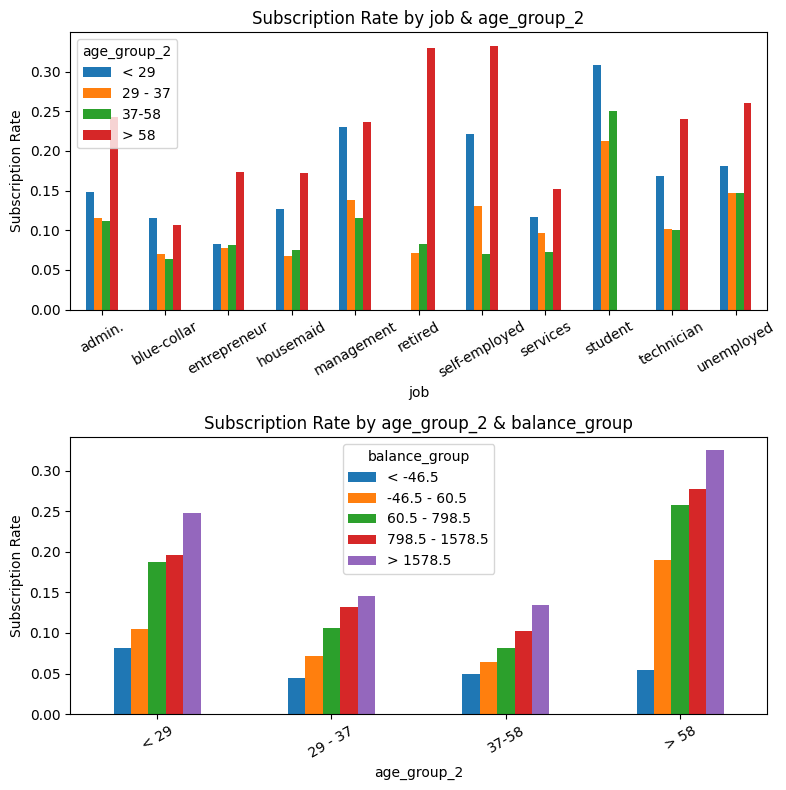

===== TIER 2: FINANCIAL CONSTRAINT =====


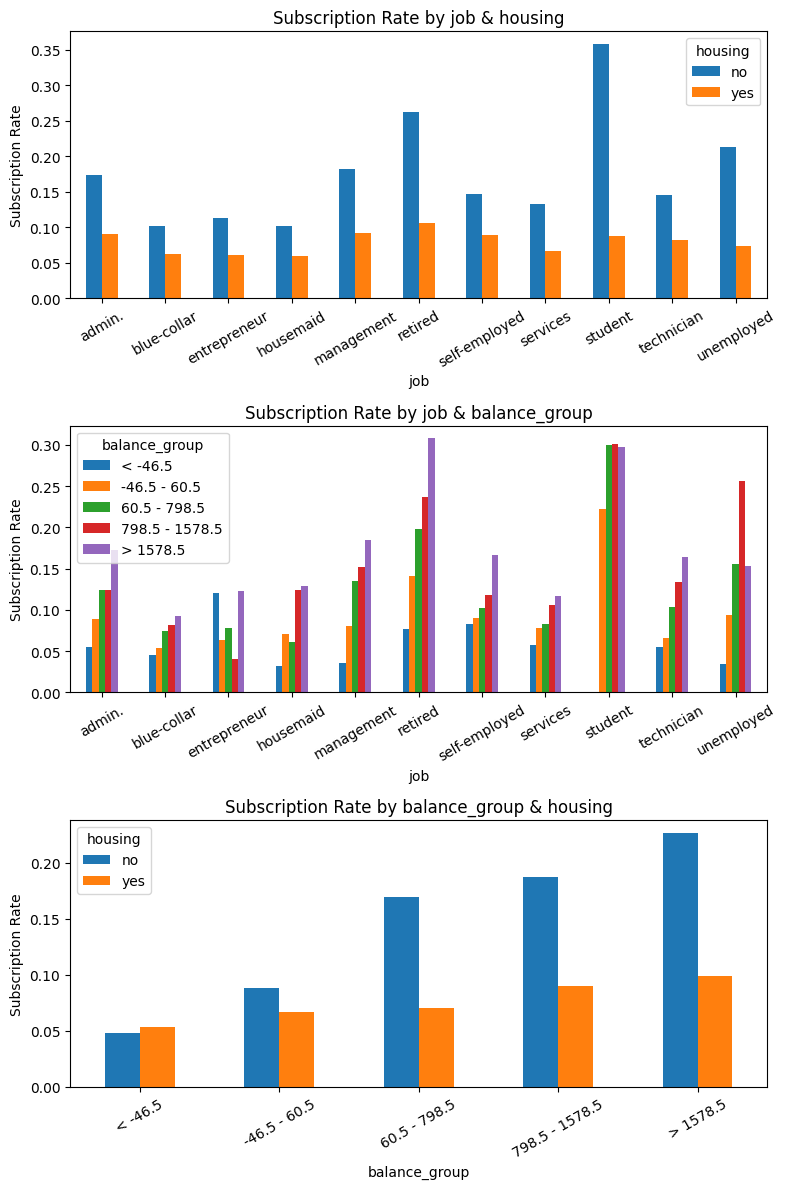

===== TIER 3: SUPPORTING ANALYSIS =====


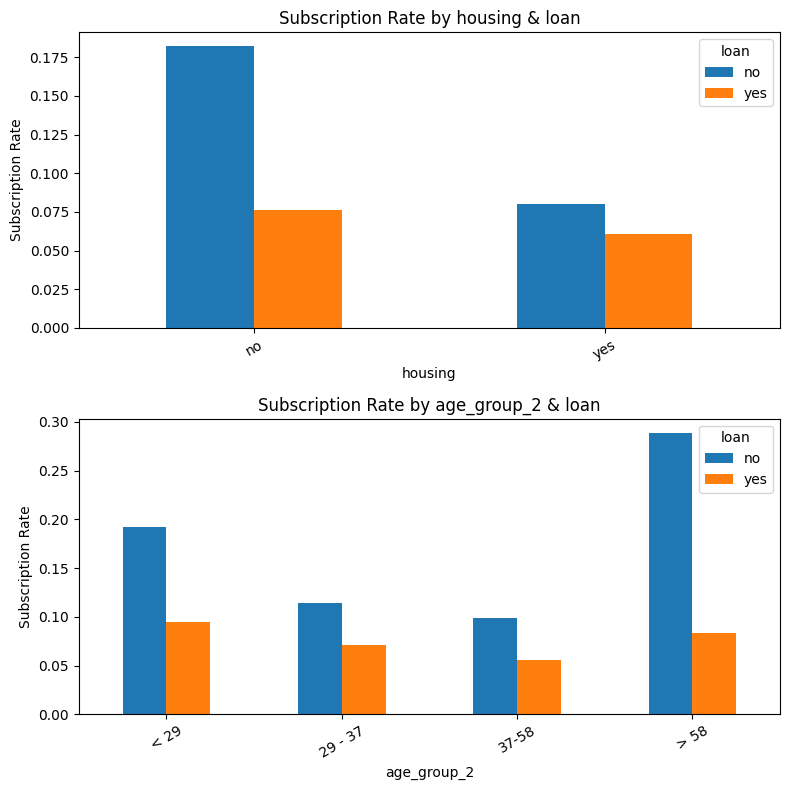

In [30]:
print("===== TIER 1: CORE INSIGHTS =====")
res_t1 = bivariate_analysis(cus_df, tier1_pairs)

print("===== TIER 2: FINANCIAL CONSTRAINT =====")
res_t2 = bivariate_analysis(cus_df, tier2_pairs)

print("===== TIER 3: SUPPORTING ANALYSIS =====")
res_t3 = bivariate_analysis(cus_df, tier3_pairs)


In [31]:
## Hàm tính rate cho mọi tổ hợp
def compute_rate(df, group_vars, target='target'):
    rate = (
        df
        .groupby(group_vars)[target]
        .mean()
        .reset_index()
        .rename(columns={target: 'subscription_rate'})
    )
    return rate

In [32]:
## Hàm sinh rule tự động
def generate_rules(
    df,
    group_vars,
    target='target',
    min_support=300,
    q=0.75
):
    """
    group_vars : list ['job','age_group_2'] hoặc ['age_group_2','balance_group']
    """

    global_rate = df[target].mean()
    rate_df = compute_rate(df, group_vars, target)

    # thêm support
    support = df.groupby(group_vars).size().reset_index(name='count')
    rate_df = rate_df.merge(support, on=group_vars)

    # ngưỡng rule mạnh
    threshold = rate_df['subscription_rate'].quantile(q)

    rules = rate_df[
        (rate_df['subscription_rate'] >= threshold) &
        (rate_df['count'] >= min_support)
    ].copy()

    rules['rule'] = rules.apply(
        lambda r: "IF " + " AND ".join(
            [f"{v} = {r[v]}" for v in group_vars]
        ) + f" THEN subscription_rate ≈ {round(r['subscription_rate']*100,1)}%",
        axis=1
    )

    return rules.sort_values('subscription_rate', ascending=False)


####    Job & age_group 2

In [33]:
rules_job_age = generate_rules(
    cus_df,
    group_vars=['job','age_group_2'],
    min_support=200,
    q=0.75
)

rules_job_age[['rule','count','subscription_rate']]


/var/folders/kr/kwr_0qbj425dp77_59mypb0w0000gn/T/ipykernel_8168/2389283862.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(group_vars)[target]
/var/folders/kr/kwr_0qbj425dp77_59mypb0w0000gn/T/ipykernel_8168/1705344442.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  support = df.groupby(group_vars).size().reset_index(name='count')


,rule,count,subscription_rate
23,IF job = retired AND age_group_2 = > 58 THEN s...,1331,0.329827
32,IF job = student AND age_group_2 = < 29 THEN s...,717,0.308229
19,IF job = management AND age_group_2 = > 58 THE...,342,0.236842
16,IF job = management AND age_group_2 = < 29 THE...,758,0.229551


**Nhìn chung thấy 2 hành vi rõ rệt :**
- Nhóm có xác xuất cao : Ngĩ hưu (>58), Sinh viên trẻ (<29>) =>ít ràng buộc tại chính, định hướng tiết kiệm rõ

- Nhóm k xuất hiện trong rule (29-58)
=> Giai đoạn chi tiêu mạnh (nhà, con cái)

#### Age_group_2 & Balance

In [34]:
rules_age_balance = generate_rules(
    cus_df,
    group_vars=['age_group_2','balance_group'],
    min_support=300,
    q=0.75
)

rules_age_balance[['rule','count','subscription_rate']]


/var/folders/kr/kwr_0qbj425dp77_59mypb0w0000gn/T/ipykernel_8168/2389283862.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(group_vars)[target]
/var/folders/kr/kwr_0qbj425dp77_59mypb0w0000gn/T/ipykernel_8168/1705344442.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  support = df.groupby(group_vars).size().reset_index(name='count')


,rule,count,subscription_rate
19,IF age_group_2 = > 58 AND balance_group = > 15...,958,0.324635
18,IF age_group_2 = > 58 AND balance_group = 798....,386,0.277202
17,IF age_group_2 = > 58 AND balance_group = 60.5...,748,0.256684
4,IF age_group_2 = < 29 AND balance_group = > 15...,875,0.248000
3,IF age_group_2 = < 29 AND balance_group = 798....,695,0.195683


**Rule 1: >58 & balance >1578.5 → 32.46%** 
=> khách hàng lớn tuổi + dư tiền cao => xác xuất đăng cao đáng kể

**Rule 2: >58 & 798.5 <banlance <1578.5 →27.7%**

**Rule 3: >58 & 60.5<balance<798.5 → 25.7%**

=> Dù balance chưa quá cao, chỉ cần>58 tuổi là xác xuất đăng kí rất cao (tuổi quan trọng hơn balance ở giai đoạn này)

**Rule 4: <29 & balance>1578.5 → 24.8%** 
=> thấp hơn 8% →cho thấy ng trẻ dù có tiền vẫn ưu tiên đầu tư, tiêu dùng hơn là tiết kiệm dài hạn

In [35]:
## Tìm ra rule cản trở
def generate_negative_rules(
    df,
    group_vars,
    target='target',
    max_rate=0.08,
    min_support=300
):
    rate_df = compute_rate(df, group_vars, target)
    support = df.groupby(group_vars).size().reset_index(name='count')
    rate_df = rate_df.merge(support, on=group_vars)

    rules = rate_df[
        (rate_df['subscription_rate'] <= max_rate) &
        (rate_df['count'] >= min_support)
    ].copy()

    rules['rule'] = rules.apply(
        lambda r: "IF " + " AND ".join(
            [f"{v} = {r[v]}" for v in group_vars]
        ) + f" THEN subscription_rate ≈ {round(r['subscription_rate']*100,1)}%",
        axis=1
    )

    return rules.sort_values('subscription_rate')


In [36]:
generate_negative_rules(
    cus_df,
    ['age_group_2','balance_group'],
    max_rate=0.08
)[['rule','count','subscription_rate']]


/var/folders/kr/kwr_0qbj425dp77_59mypb0w0000gn/T/ipykernel_8168/2389283862.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(group_vars)[target]
/var/folders/kr/kwr_0qbj425dp77_59mypb0w0000gn/T/ipykernel_8168/2883787172.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  support = df.groupby(group_vars).size().reset_index(name='count')


,rule,count,subscription_rate
5,IF age_group_2 = 29 - 37 AND balance_group = <...,1093,0.043916
10,IF age_group_2 = 37-58 AND balance_group = < -...,1625,0.049846
11,IF age_group_2 = 37-58 AND balance_group = -46...,3649,0.063579
6,IF age_group_2 = 29 - 37 AND balance_group = -...,2691,0.072092


#### Job & Housing

In [37]:
rules_job_housing = generate_rules(
    cus_df,
    group_vars=['job','housing'],
    min_support=300,
    q=0.75
)

rules_job_housing[['rule','count','subscription_rate']]


,rule,count,subscription_rate
16,IF job = student AND housing = no THEN subscri...,689,0.358491
10,IF job = retired AND housing = no THEN subscri...,1773,0.261703
20,IF job = unemployed AND housing = no THEN subs...,760,0.213158
8,IF job = management AND housing = no THEN subs...,4780,0.182008
0,IF job = admin. AND housing = no THEN subscrip...,1989,0.172951
12,IF job = self-employed AND housing = no THEN s...,814,0.146192


Có thể thấy rõ housing là rào cản tài chính mạnh, khi **housing = no**-> tỉ lệ đăng kí cao
 
 => “Kết quả cho thấy ngay cả khi có năng lực thu nhập tốt, nghĩa vụ vay mua nhà vẫn làm suy giảm đáng kể khả năng tham gia sản phẩm tiết kiệm.”

In [38]:
neg_job_housing = generate_negative_rules(
    cus_df,
    group_vars=['job', 'housing'],
    max_rate=0.08,
    min_support=300
)

neg_job_housing[['rule','count','subscription_rate']]


,rule,count,subscription_rate
7,IF job = housemaid AND housing = yes THEN subs...,398,0.060302
5,IF job = entrepreneur AND housing = yes THEN s...,869,0.060990
3,IF job = blue-collar AND housing = yes THEN su...,7048,0.061720
15,IF job = services AND housing = yes THEN subsc...,2766,0.066884
21,IF job = unemployed AND housing = yes THEN sub...,543,0.073665


#### Job × Balance

In [39]:
rules_job_balance = generate_rules(
    cus_df,
    group_vars=['job','balance_group'],
    min_support=300,
    q=0.75
)

rules_job_balance[['rule','count','subscription_rate']]


/var/folders/kr/kwr_0qbj425dp77_59mypb0w0000gn/T/ipykernel_8168/2389283862.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(group_vars)[target]
/var/folders/kr/kwr_0qbj425dp77_59mypb0w0000gn/T/ipykernel_8168/1705344442.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  support = df.groupby(group_vars).size().reset_index(name='count')


,rule,count,subscription_rate
29,IF job = retired AND balance_group = > 1578.5 ...,770,0.307792
42,IF job = student AND balance_group = 60.5 - 79...,440,0.300000
28,IF job = retired AND balance_group = 798.5 - 1...,355,0.236620
27,IF job = retired AND balance_group = 60.5 - 79...,716,0.198324
24,IF job = management AND balance_group = > 1578...,2660,0.185338
4,IF job = admin. AND balance_group = > 1578.5 T...,1014,0.171598
34,IF job = self-employed AND balance_group = > 1...,401,0.167082
49,IF job = technician AND balance_group = > 1578...,1663,0.164161
52,IF job = unemployed AND balance_group = 60.5 -...,486,0.156379
54,IF job = unemployed AND balance_group = > 1578...,333,0.153153


In [40]:
neg_job_balance = generate_negative_rules(
    cus_df,
    ['job','balance_group'],
    max_rate=0.08,
    min_support=500
)

neg_job_balance[['rule','count','subscription_rate']]


/var/folders/kr/kwr_0qbj425dp77_59mypb0w0000gn/T/ipykernel_8168/2389283862.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(group_vars)[target]
/var/folders/kr/kwr_0qbj425dp77_59mypb0w0000gn/T/ipykernel_8168/2883787172.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  support = df.groupby(group_vars).size().reset_index(name='count')


,rule,count,subscription_rate
5,IF job = blue-collar AND balance_group = < -46...,938,0.044776
6,IF job = blue-collar AND balance_group = -46.5...,1548,0.053618
45,IF job = technician AND balance_group = < -46....,577,0.055459
46,IF job = technician AND balance_group = -46.5 ...,1315,0.066160
7,IF job = blue-collar AND balance_group = 60.5 ...,4007,0.074120
12,IF job = entrepreneur AND balance_group = 60.5...,565,0.077876
36,IF job = services AND balance_group = -46.5 - ...,755,0.078146


#### Balance & Housing

In [41]:
rules_housing_balance = generate_rules(
    cus_df,
    group_vars=['housing','balance_group'],
    min_support=300,
    q=0.75
)

rules_housing_balance[['rule','count','subscription_rate']]


/var/folders/kr/kwr_0qbj425dp77_59mypb0w0000gn/T/ipykernel_8168/2389283862.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(group_vars)[target]
/var/folders/kr/kwr_0qbj425dp77_59mypb0w0000gn/T/ipykernel_8168/1705344442.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  support = df.groupby(group_vars).size().reset_index(name='count')


,rule,count,subscription_rate
4,IF housing = no AND balance_group = > 1578.5 T...,5337,0.226719
3,IF housing = no AND balance_group = 798.5 - 15...,2816,0.187145
2,IF housing = no AND balance_group = 60.5 - 798...,7353,0.169183


In [42]:
neg_housing_balance = generate_negative_rules(
    cus_df,
    ['housing','balance_group'],
    max_rate=0.08,
    min_support=500
)

neg_housing_balance[['rule','count','subscription_rate']]


/var/folders/kr/kwr_0qbj425dp77_59mypb0w0000gn/T/ipykernel_8168/2389283862.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(group_vars)[target]
/var/folders/kr/kwr_0qbj425dp77_59mypb0w0000gn/T/ipykernel_8168/2883787172.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  support = df.groupby(group_vars).size().reset_index(name='count')


,rule,count,subscription_rate
0,IF housing = no AND balance_group = < -46.5 TH...,776,0.047680
5,IF housing = yes AND balance_group = < -46.5 T...,2417,0.053372
6,IF housing = yes AND balance_group = -46.5 - 6...,3829,0.067381
7,IF housing = yes AND balance_group = 60.5 - 79...,10224,0.070325


#### Housing & Loan

In [43]:
rules_housing_loan = generate_rules(
    cus_df,
    group_vars=['housing','loan'],
    min_support=300,
    q=0.75
)

rules_housing_loan[['rule','count','subscription_rate']]


,rule,count,subscription_rate
0,IF housing = no AND loan = no THEN subscriptio...,17204,0.182225


In [44]:
neg_housing_loan = generate_negative_rules(
    cus_df,
    ['housing','loan'],
    max_rate=0.08,
    min_support=500
)

neg_housing_loan[['rule','count','subscription_rate']]


,rule,count,subscription_rate
3,IF housing = yes AND loan = yes THEN subscript...,4367,0.060682
1,IF housing = no AND loan = yes THEN subscripti...,2877,0.076121


In [45]:
rules_age_loan = generate_rules(
    cus_df,
    group_vars=['age_group_2','loan'],
    min_support=300,
    q=0.75
)

rules_age_loan[['rule','count','subscription_rate']]


/var/folders/kr/kwr_0qbj425dp77_59mypb0w0000gn/T/ipykernel_8168/2389283862.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(group_vars)[target]
/var/folders/kr/kwr_0qbj425dp77_59mypb0w0000gn/T/ipykernel_8168/1705344442.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  support = df.groupby(group_vars).size().reset_index(name='count')


,rule,count,subscription_rate
6,IF age_group_2 = > 58 AND loan = no THEN subsc...,2312,0.288927
0,IF age_group_2 = < 29 AND loan = no THEN subsc...,4382,0.192378


In [46]:
neg_age_loan = generate_negative_rules(
    cus_df,
    ['age_group_2','loan'],
    max_rate=0.08,
    min_support=500
)

neg_age_loan[['rule','count','subscription_rate']]


/var/folders/kr/kwr_0qbj425dp77_59mypb0w0000gn/T/ipykernel_8168/2389283862.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(group_vars)[target]
/var/folders/kr/kwr_0qbj425dp77_59mypb0w0000gn/T/ipykernel_8168/2883787172.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  support = df.groupby(group_vars).size().reset_index(name='count')


,rule,count,subscription_rate
5,IF age_group_2 = 37-58 AND loan = yes THEN sub...,3754,0.056473
3,IF age_group_2 = 29 - 37 AND loan = yes THEN s...,2357,0.070853


#### DECISION TREE 

In [47]:
features = [
    'age_group_2',
    'job',
    'balance_group',
    'housing',
    'loan'
]

In [48]:
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier

df_tree = cus_df[features + ['target']].copy()

le = LabelEncoder()
for col in features:
    df_tree[col] = le.fit_transform(df_tree[col])


X = df_tree[features]
y = df_tree['target']

tree = DecisionTreeClassifier(
    max_depth=4,
    min_samples_leaf=300,
    random_state=42
)

tree.fit(X, y)

,criterion,'gini'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,300
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [49]:
import pandas as pd

pd.Series(
    tree.feature_importances_,
    index=features
).sort_values(ascending=False)


age_group_2      0.380023
housing          0.377537
balance_group    0.158003
loan             0.081205
job              0.003232
dtype: float64

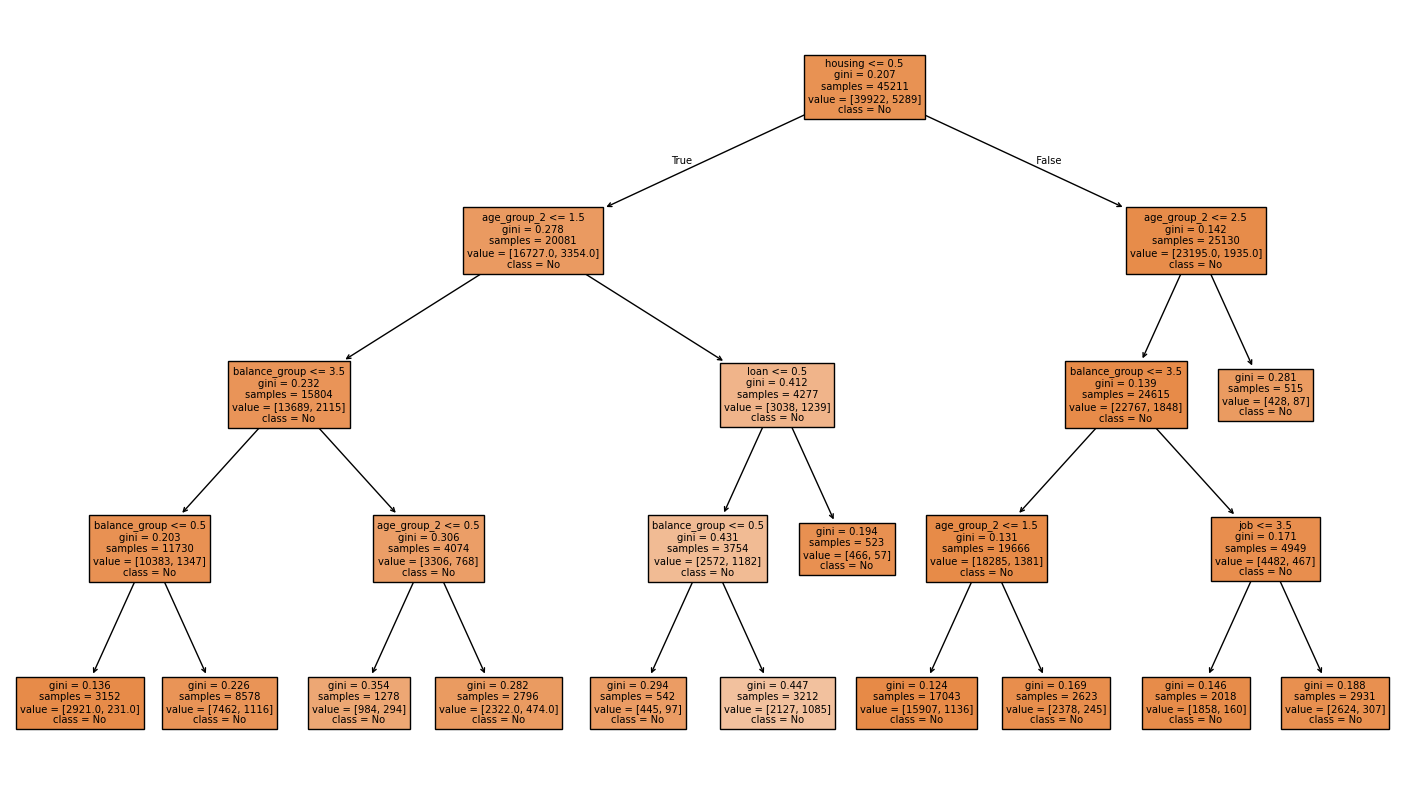

In [50]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(18,10))
plot_tree(
    tree,
    feature_names=features,
    class_names=['No','Yes'],
    filled=True
)
plt.show()
